# Tensorflow agents


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/265

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/265


In [2]:
%cd highway-env
!pip install pygame

/content/gdrive/My Drive/265/highway-env
     |████████████████████████████████| 11.4MB 2.7MB/s 


In [3]:
# Environment
#!pip install git+https://github.com/eleurent/highway-env#egg=highway-env  > /dev/null 2>&1
import gym
import highway_env

# Agent
!pip install git+https://github.com/eleurent/rl-agents#egg=rl-agents > /dev/null 2>&1
from rl_agents.agents.common.factory import agent_factory

# Visualisation
import sys
from tqdm import tnrange
#!git clone https://github.com/eleurent/highway-env.git > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
#sys.path.insert(0, './scripts/')
from scripts.utils import record_videos, show_videos, capture_intermediate_frames


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


In [4]:
!sudo apt-get install -y xvfb ffmpeg
!pip install -q 'gym==0.10.11'
!pip install -q 'imageio==2.4.0'
!pip install -q PILLOW
!pip install -q 'pyglet==1.3.2'
!pip install -q pyvirtualdisplay
!pip install -q --upgrade tensorflow-probability
!pip install -q tf-agents

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
     |████████████████████████████████| 1.5MB 2.9MB/s 
     |████████████████████████████████| 3.3MB 2.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 1.0MB 2.8MB/s 
     |████████████████████████████████| 911kB 2.8MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 


In [5]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.reinforce import reinforce_agent
from tf_agents.drivers import dynamic_step_driver
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import actor_distribution_network
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.utils import common

tf.compat.v1.enable_v2_behavior()


# Set up a virtual display for rendering OpenAI gym environments.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


In [0]:
#hyperparameters

env_name = "highway-v0" # @param {type:"string"}
num_iterations = 250 # @param {type:"integer"}
collect_episodes_per_iteration = 2 # @param {type:"integer"}
replay_buffer_capacity = 2000 # @param {type:"integer"}

fc_layer_params = (100,)

learning_rate = 1e-3 # @param {type:"number"}
log_interval = 25 # @param {type:"integer"}
num_eval_episodes = 10 # @param {type:"integer"}
eval_interval = 50 # @param {type:"integer"}

In [7]:
#loading environment
env = suite_gym.load(env_name)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


TimeStep(step_type=array(0, dtype=int32), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[ 1.        ,  0.166643  ,  0.75      ,  0.41666666,  0.        ],
       [ 1.        ,  0.14745182,  0.        , -0.03124938,  0.        ],
       [ 1.        ,  0.36496606, -0.75      , -0.02144451,  0.        ],
       [ 1.        ,  0.560215  , -0.5       , -0.03200852,  0.        ],
       [ 1.        ,  0.75554997, -0.25      , -0.00627434,  0.        ]],
      dtype=float32))


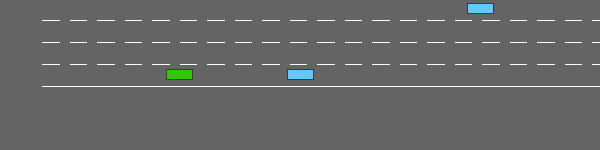

In [8]:
#check how it looks like
a = env.reset()
print(a)
PIL.Image.fromarray(env.render())

In [10]:
# explorint rl elements
print('Observation Spec:')
print(env.time_step_spec().observation)
print('Reward Spec:')
print(env.time_step_spec().reward)
print('Action Spec:')
print(env.action_spec())
time_step = env.reset()
print('Time step:')
print(time_step)

action = np.array(1, dtype=np.int32)

next_time_step = env.step(action)
print('Next time step:')
print(next_time_step)


Observation Spec:
BoundedArraySpec(shape=(5, 5), dtype=dtype('float32'), name='observation', minimum=-1.0, maximum=1.0)
Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')
Action Spec:
BoundedArraySpec(shape=(), dtype=dtype('int64'), name='action', minimum=0, maximum=4)
Time step:
TimeStep(step_type=array(0, dtype=int32), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[ 1.        ,  0.2136005 ,  0.25      ,  0.41666666,  0.        ],
       [ 1.        ,  0.11254444,  0.5       , -0.01432788,  0.        ],
       [ 1.        ,  0.31942037,  0.        , -0.02145114,  0.        ],
       [ 1.        ,  0.49912992,  0.5       , -0.03128592,  0.        ],
       [ 1.        ,  0.7102958 ,  0.5       , -0.02770986,  0.        ]],
      dtype=float32))


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Next time step:
TimeStep(step_type=array(1, dtype=int32), reward=array(0.82222223, dtype=float32), discount=array(1., dtype=float32), observation=array([[ 1.        ,  0.38026717,  0.25      ,  0.41666666,  0.        ],
       [ 1.        ,  0.09991793,  0.4369494 , -0.05216781, -0.05949064],
       [ 1.        ,  0.30919167,  0.06398912, -0.02772691, -0.00511394],
       [ 1.        ,  0.47127265,  0.38550547, -0.10345627, -0.06352167],
       [ 1.        ,  0.6860408 ,  0.5       , -0.08343704,  0.        ]],
      dtype=float32))


In [11]:
# create train and evaluation environments
train_py_env = suite_gym.load(env_name)
eval_py_env = suite_gym.load(env_name)

train_env = tf_py_environment.TFPyEnvironment(train_py_env)
eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [0]:
# create the actor network
actor_net = actor_distribution_network.ActorDistributionNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    fc_layer_params=fc_layer_params)

In [0]:
# define optimizer and REINFORCE agent
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)

train_step_counter = tf.compat.v2.Variable(0)

tf_agent = reinforce_agent.ReinforceAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    actor_network=actor_net,
    optimizer=optimizer,
    normalize_returns=True,
    train_step_counter=train_step_counter)
tf_agent.initialize()

In [0]:
# the agent contain 2 policies
eval_policy = tf_agent.policy  #policy used to evaluate 
collect_policy = tf_agent.collect_policy #policy used to collect data

In [0]:
# define metric function 
def compute_avg_return(environment, policy, num_episodes=10):

  total_return = 0.0
  for _ in range(num_episodes):

    time_step = environment.reset()
    episode_return = 0.0

    while not time_step.is_last():
      action_step = policy.action(time_step)
      time_step = environment.step(action_step.action)
      episode_return += time_step.reward
    total_return += episode_return

  avg_return = total_return / num_episodes
  return avg_return.numpy()[0]


In [0]:
# create TF Uniform Replay Buffer to collect data
replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=tf_agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=replay_buffer_capacity)

In [0]:
# collect data

def collect_episode(environment, policy, num_episodes):

  episode_counter = 0
  environment.reset()

  while episode_counter < num_episodes:
    time_step = environment.current_time_step()
    action_step = policy.action(time_step)
    next_time_step = environment.step(action_step.action)
    traj = trajectory.from_transition(time_step, action_step, next_time_step)

    # Add trajectory to the replay buffer
    replay_buffer.add_batch(traj)

    if traj.is_boundary():
      episode_counter += 1


In [22]:
# Training

try:
  %%time
except:
  pass

# (Optional) Optimize by wrapping some of the code in a graph using TF function.
tf_agent.train = common.function(tf_agent.train)

# Reset the train step
tf_agent.train_step_counter.assign(0)

# Evaluate the agent's policy once before training.
avg_return = compute_avg_return(eval_env, tf_agent.policy, num_eval_episodes)
returns = [avg_return]

for _ in range(num_iterations):

  # Collect a few episodes using collect_policy and save to the replay buffer.
  collect_episode(
      train_env, tf_agent.collect_policy, collect_episodes_per_iteration)

  # Use data from the buffer and update the agent's network.
  experience = replay_buffer.gather_all()
  train_loss = tf_agent.train(experience)
  replay_buffer.clear()

  step = tf_agent.train_step_counter.numpy()

  if step % log_interval == 0:
    print('step = {0}: loss = {1}'.format(step, train_loss.loss))

  if step % eval_interval == 0:
    avg_return = compute_avg_return(eval_env, tf_agent.policy, num_eval_episodes)
    print('step = {0}: Average Return = {1}'.format(step, avg_return))
    returns.append(avg_return)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


step = 25: loss = 0.5802450180053711
step = 50: loss = -4.061455726623535
step = 50: Average Return = 27.822219848632812
step = 75: loss = 1.5450966358184814
step = 100: loss = 2.726442337036133
step = 100: Average Return = 28.177776336669922
step = 125: loss = -0.5606245398521423
step = 150: loss = -0.2358086109161377
step = 150: Average Return = 27.111103057861328
step = 175: loss = -0.07358503341674805
step = 200: loss = -3.5133886337280273
step = 200: Average Return = 28.533336639404297
step = 225: loss = 1.4915372133255005
step = 250: loss = 2.5549323558807373
step = 250: Average Return = 27.822219848632812


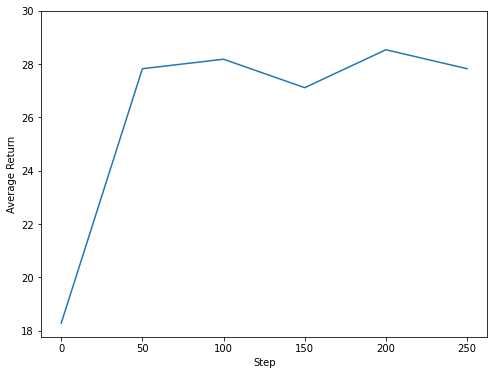

In [29]:
# plot average return 
steps = range(0, num_iterations + 1, eval_interval)
plt.figure(figsize=(8,6))
plt.plot(steps, returns)
plt.ylabel('Average Return')
plt.xlabel('Step')
plt.ylim(top=30)
import os 
os.chdir('/content/gdrive/My Drive/265')
plt.savefig('Reinforce.png')

In [0]:
#make video
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

num_episodes = 3
video_filename = 'imageio.mp4'
with imageio.get_writer(video_filename, fps=60) as video:
  for _ in range(num_episodes):
    time_step = eval_env.reset()
    video.append_data(eval_py_env.render())
    while not time_step.is_last():
      action_step = tf_agent.policy.action(time_step)
      time_step = eval_env.step(action_step.action)
      video.append_data(eval_py_env.render())

embed_mp4(video_filename)

In [0]:
#save policy
from tf_agents.policies.policy_saver import PolicySaver

my_policy = agent.collect_policy
saver = PolicySaver(my_policy, batch_size=None)

saver.save('/content/gdrive/My Drive/265/policy_10000')


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/265/policy_10000/assets


INFO:tensorflow:Assets written to: /content/gdrive/My Drive/265/policy_10000/assets
